In [3]:
import os

import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_1060280/842732438.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


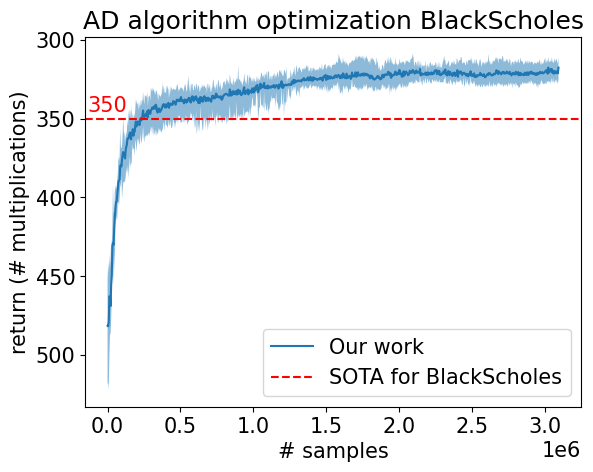

In [6]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 750 # 2200

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*129
								num_muls = data[:l, 1]
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)

fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-350., color="r", linestyle="--", label="SOTA for BlackScholes")
ax.annotate("350", (num_samples[0], -350), textcoords="offset points", xytext=(0, 5), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")

ax.set_title("AD algorithm optimization BlackScholes")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [1]:
from graphax.perf import plot_performance
from graphax.examples import BlackScholes_Jacobian

In [2]:
# 312 mults
order = [70, 16, 104, 43, 11, 15, 36, 71, 62, 42, 57, 24, 101, 74, 54, 96, 64, 
         65, 119, 14, 118, 50, 76, 61, 32, 19, 17, 45, 40, 59, 100, 68, 49, 126, 
         114, 83, 60, 116, 113, 20, 78, 25, 121, 6, 48, 31, 84, 66, 18, 28, 133, 
         10, 12, 58, 13, 87, 110, 29, 46, 38, 120, 92, 21, 77, 44, 107, 105, 81, 
         7, 56, 47, 55, 124, 67, 75, 93, 95, 79, 89, 86, 103, 82, 37, 94, 8, 52, 
         1, 111, 106, 23, 9, 53, 85, 90, 112, 69, 41, 34, 98, 35, 51, 22, 80, 
         72, 115, 91, 33, 39, 27, 99, 30, 88, 131, 123, 117, 73, 2, 109, 26, 5, 
         63, 128, 108, 4, 97, 102, 3, 125, 130]

mM_order = [16, 15, 31, 33, 36, 37, 38, 40, 42, 43, 41, 49, 50, 54, 55, 57,
												58, 59, 61, 63, 64, 62, 70, 71, 75, 76, 79, 80, 89, 96, 5, 6, 
												7, 9, 10, 11, 12, 13, 20, 23, 24, 25, 28, 44, 45, 46, 47, 48, 
												51, 52, 65, 66, 67, 68, 69, 72, 73, 85, 86, 92, 93, 95, 100, 
												101, 115, 120, 1, 8, 14, 17, 26, 29, 32, 34, 39, 53, 56, 60, 
												74, 77, 81, 82, 83, 84, 88, 90, 91, 98, 99, 103, 104, 105, 110, 
												112, 114, 116, 117, 118, 124, 128, 131, 133, 19, 27, 94, 106, 
												111, 113, 121, 126, 4, 78, 107, 2, 21, 123, 119, 18, 102, 130, 
												30, 35, 97, 109, 87, 125, 3, 22, 108]

In [4]:
from graphax import jacve
batchsize = 512
key = jrand.PRNGKey(42)
xs = [jnp.ones(batchsize) for _ in range(5)]
xs = jax.device_put(xs, jax.devices("cpu")[0])
grad_f = jax.jit(jacve(BlackScholes_Jacobian, order=order, argnums=(0, 1, 2, 3, 4)))

  0%|          | 0/1000 [00:00<?, ?it/s]

33 : 2
32 : 2
31 : 1
30 : 1
29 : 1
28 : 2
27 : 0
26 : 0
25 : 2
24 : 1
23 : 1
22 : 1
21 : 2
20 : 0
19 : 0
18 : 1
17 : 2
16 : 1
15 : 2
14 : 2
13 : 1
12 : 2
11 : 2
10 : 1
9 : 2
8 : 2
7 : 1
6 : 1
5 : 1
4 : 2
3 : 2
2 : 1
1 : 2
129 129
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 128, 130, 131, 133}
70 : 0
16 : 0
104 : 1024
43 : 1024
11 : 1024
15 : 0
36 : 0
71 : 0
62 : 512
42 : 512
57 : 0
24 : 512
101 : 512
74 : 1024
54 : 512
96 : 0
64 : 1024
65 : 512
119 : 1024
14 : 1024
118 : 1024
50 : 0
76 : 0
61 : 512
32 : 1024
19 : 1536
17

  0%|          | 0/1000 [00:00<?, ?it/s]

33 : 2
32 : 2
31 : 1
30 : 1
29 : 1
28 : 2
27 : 0
26 : 0
25 : 2
24 : 1
23 : 1
22 : 1
21 : 2
20 : 0
19 : 0
18 : 1
17 : 2
16 : 1
15 : 2
14 : 2
13 : 1
12 : 2
11 : 2
10 : 1
9 : 2
8 : 2
7 : 1
6 : 1
5 : 1
4 : 2
3 : 2
2 : 1
1 : 2
129 129
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 128, 130, 131, 133}
16 : 0
15 : 0
31 : 0
33 : 0
36 : 0
37 : 0
38 : 0
40 : 0
42 : 0
43 : 512
41 : 512
49 : 0
50 : 0
54 : 512
55 : 0
57 : 0
58 : 0
59 : 0
61 : 0
63 : 0
64 : 512
62 : 512
70 : 0
71 : 0
75 : 512
76 : 0
79 : 0
80 : 0
89 : 0
96 : 0
5 : 512
6 

  0%|          | 0/1000 [00:00<?, ?it/s]

33 : 2
32 : 2
31 : 1
30 : 1
29 : 1
28 : 2
27 : 0
26 : 0
25 : 2
24 : 1
23 : 1
22 : 1
21 : 2
20 : 0
19 : 0
18 : 1
17 : 2
16 : 1
15 : 2
14 : 2
13 : 1
12 : 2
11 : 2
10 : 1
9 : 2
8 : 2
7 : 1
6 : 1
5 : 1
4 : 2
3 : 2
2 : 1
1 : 2
133 : 1024
131 : 1024
130 : 2048
128 : 2048
126 : 1024
125 : 3072
124 : 3072
123 : 4096
121 : 1024
120 : 0
119 : 1024
118 : 1024
117 : 0
116 : 512
115 : 2048
114 : 1024
113 : 1024
112 : 1024
111 : 1024
110 : 1024
109 : 2048
108 : 4096
107 : 1024
106 : 1024
105 : 1024
104 : 1024
103 : 2048
102 : 5120
101 : 2560
100 : 1024
99 : 1024
98 : 1024
97 : 2048
96 : 0
95 : 5120
94 : 5120
93 : 2560
92 : 0
91 : 0
90 : 3072
89 : 0
88 : 5120
87 : 5120
86 : 2560
85 : 0
84 : 0
83 : 1024
82 : 1024
81 : 1536
80 : 0
79 : 0
78 : 2048
77 : 2048
76 : 0
75 : 0
74 : 1536
73 : 1536
72 : 5120
71 : 0
70 : 0
69 : 2560
68 : 2560
67 : 2560
66 : 2560
65 : 1536
64 : 0
63 : 0
62 : 0
61 : 2560
60 : 5120
59 : 0
58 : 0
57 : 0
56 : 2048
55 : 0
54 : 0
53 : 1536
52 : 1536
51 : 5120
50 : 0
49 : 0
48 : 2560
4

  0%|          | 0/1000 [00:00<?, ?it/s]

33 : 2
32 : 2
31 : 1
30 : 1
29 : 1
28 : 2
27 : 0
26 : 0
25 : 2
24 : 1
23 : 1
22 : 1
21 : 2
20 : 0
19 : 0
18 : 1
17 : 2
16 : 1
15 : 2
14 : 2
13 : 1
12 : 2
11 : 2
10 : 1
9 : 2
8 : 2
7 : 1
6 : 1
5 : 1
4 : 2
3 : 2
2 : 1
1 : 2
1 : 1024
2 : 3072
3 : 6144
4 : 4096
5 : 512
6 : 1536
7 : 512
8 : 2048
9 : 2048
10 : 2048
11 : 1024
12 : 512
13 : 512
14 : 1024
15 : 512
16 : 0
17 : 1024
18 : 5120
19 : 1536
20 : 512
21 : 3072
22 : 7680
23 : 1024
24 : 2560
25 : 1024
26 : 2560
27 : 1536
28 : 512
29 : 1024
30 : 5120
31 : 0
32 : 1024
33 : 0
34 : 1024
35 : 4096
36 : 0
37 : 0
38 : 0
39 : 5120
40 : 0
41 : 2560
42 : 0
43 : 2560
44 : 2560
45 : 2560
46 : 2560
47 : 2560
48 : 2560
49 : 0
50 : 0
51 : 2560
52 : 5120
53 : 5120
54 : 2560
55 : 0
56 : 2560
57 : 0
58 : 0
59 : 0
60 : 5120
61 : 0
62 : 2560
63 : 0
64 : 2560
65 : 2560
66 : 2560
67 : 2560
68 : 2560
69 : 2560
70 : 0
71 : 0
72 : 2560
73 : 5120
74 : 5120
75 : 2560
76 : 0
77 : 2560
78 : 5120
79 : 0
80 : 0
81 : 2048
82 : 2048
83 : 2560
84 : 0
85 : 0
86 : 0
87 : 5

100%|██████████| 1000/1000 [00:06<00:00, 152.01it/s]


fwd median: 4.8473052978515625, rev median: 5.017673015594482, mM median: 4.906215667724609, cc median: 4.616734504699707
fwd err: [-0.3200407   0.25812435], rev err: [-0.32129908  0.20165873], mM err: [-0.4872799   0.26122093], cc err: [-0.35721254  0.31403065]


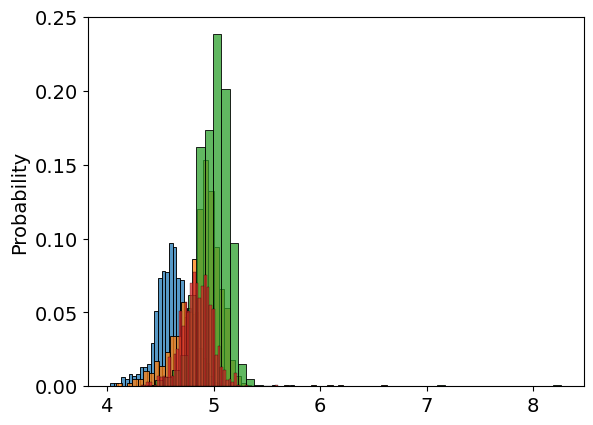

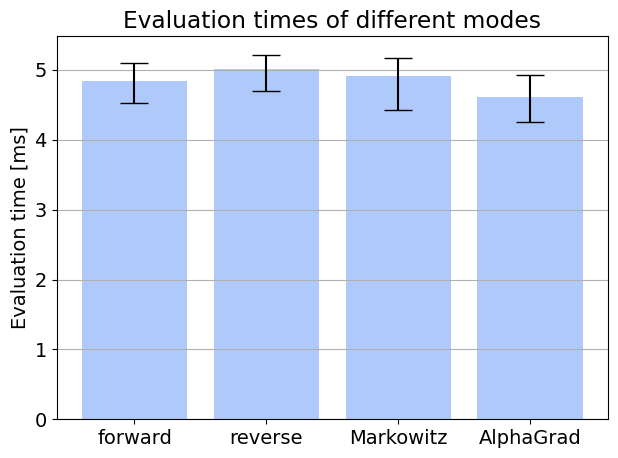

In [7]:
plot_performance(BlackScholes_Jacobian, xs, order, mM_order, "./BlackScholes.png", samplesize=1000)

100%|██████████| 110/110 [00:27<00:00,  4.01it/s]


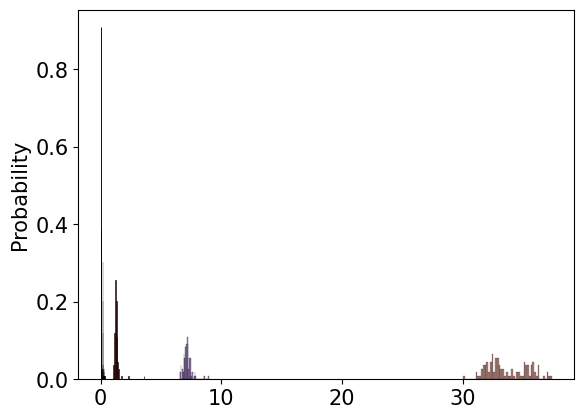

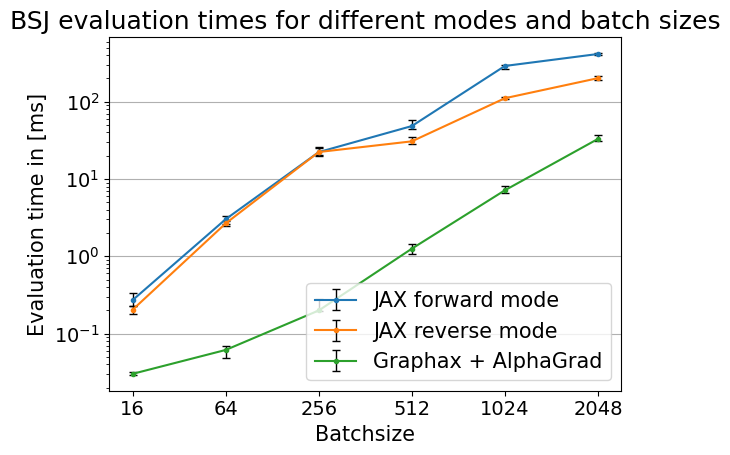

In [6]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [jnp.ones(1) for _ in range(5)]
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(BlackScholes_Jacobian, xs, order, "BSJ", ticks=shapes, samplesize=110)